In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv(r"C:\Users\ajmal\Downloads\DSA\salarydata_train.csv")

In [3]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,41,State-gov,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,40,>50K
1,39,State-gov,10,Separated,Exec-managerial,Unmarried,Black,Female,30,<=50K
2,58,State-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,>50K
3,57,State-gov,16,Divorced,Prof-specialty,Unmarried,White,Female,50,<=50K
4,32,State-gov,9,Married-civ-spouse,Protective-serv,Husband,White,Male,45,<=50K
...,...,...,...,...,...,...,...,...,...,...
26570,58,Federal-gov,10,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,Male,40,>50K
26571,40,Federal-gov,10,Never-married,Adm-clerical,Own-child,White,Female,40,<=50K
26572,49,Federal-gov,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,60,>50K
26573,57,Federal-gov,10,Divorced,Adm-clerical,Own-child,White,Male,40,<=50K


In [4]:
df1=df.groupby(['salary','workclass']).size().reset_index()

In [5]:
df1

,salary,workclass,0
0,<=50K,Federal-gov,578
1,<=50K,Local-gov,1458
2,<=50K,Private,17410
3,<=50K,State-gov,935
4,>50K,Federal-gov,365
5,>50K,Local-gov,609
6,>50K,Private,4876
7,>50K,State-gov,344


<AxesSubplot:xlabel='workclass', ylabel='count'>

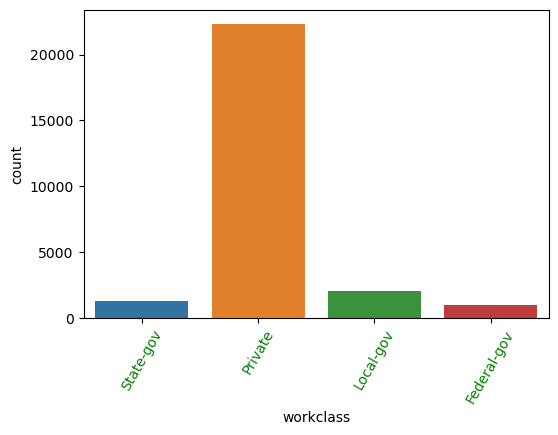

In [6]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=60,color='green')
sns.countplot(x='workclass',data=df)

In [7]:
df.isna().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
salary            0
dtype: int64

In [8]:
df.nunique()

age               72
workclass          4
education-num     16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
hours-per-week    90
salary             2
dtype: int64

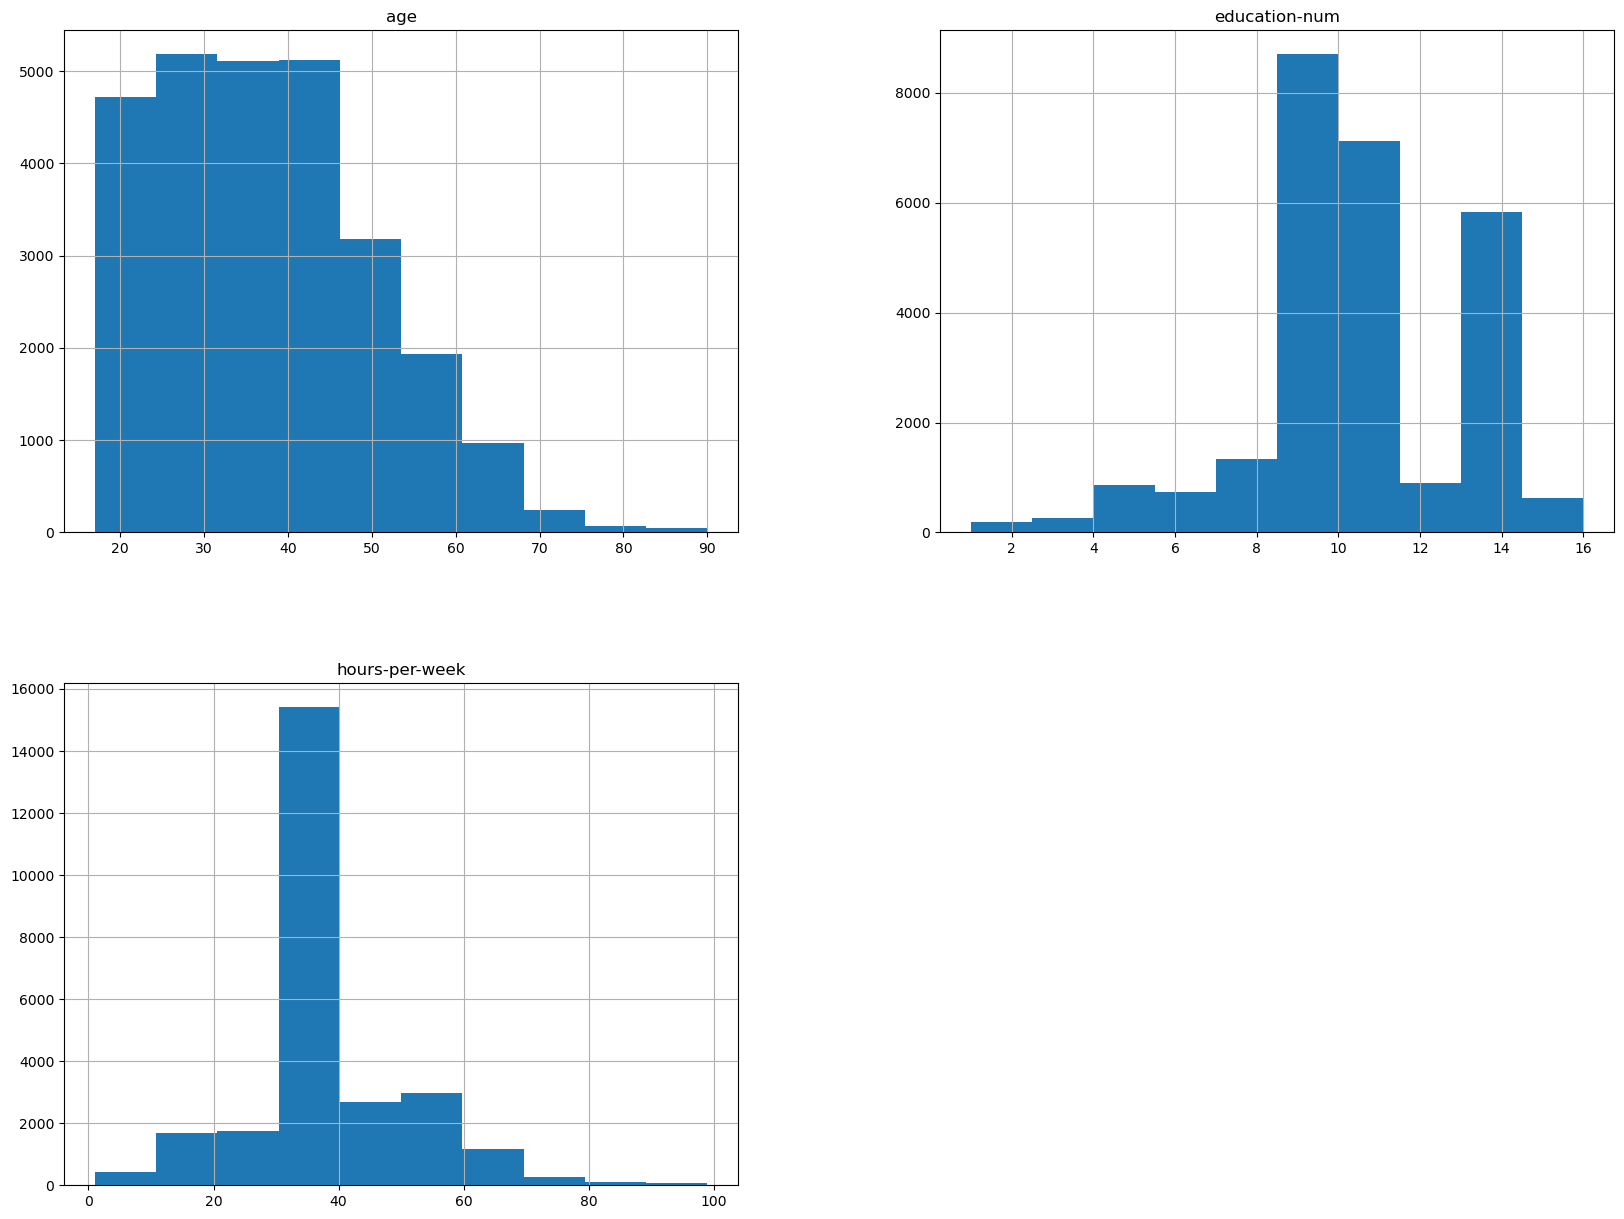

In [9]:
df.hist(figsize=[20,15]);

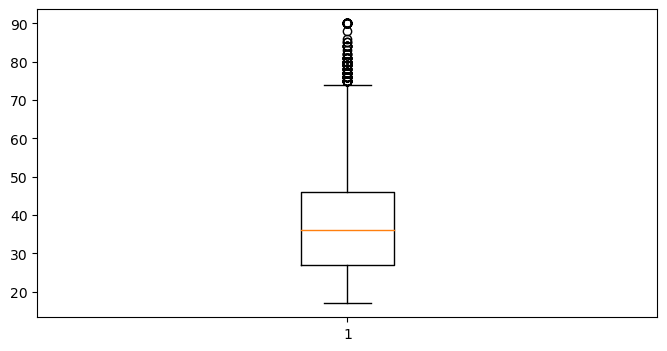

In [10]:
plt.figure(figsize=(8,4))
plt.boxplot((df['age']))
plt.show()

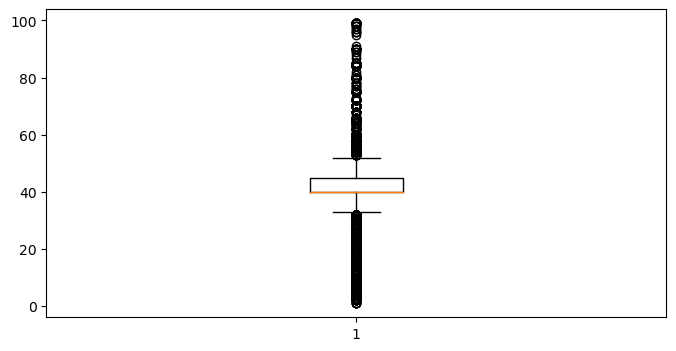

In [11]:
plt.figure(figsize=(8,4))
plt.boxplot((df['hours-per-week']))
plt.show()

In [12]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns 

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [13]:
df=MultiColumnLabelEncoder(columns = ['workclass','marital-status','occupation','relationship','race','sex','salary']).fit_transform(df)

In [14]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,41,3,13,2,4,0,4,1,40,1
1,39,3,10,5,3,4,2,0,30,0
2,58,3,14,2,9,0,4,1,50,1
3,57,3,16,0,9,4,4,0,50,0
4,32,3,9,2,10,0,4,1,45,0
...,...,...,...,...,...,...,...,...,...,...
26570,58,0,10,2,12,0,1,1,40,1
26571,40,0,10,4,0,3,4,0,40,0
26572,49,0,12,2,0,0,4,1,60,1
26573,57,0,10,0,0,3,4,1,40,0


<AxesSubplot:>

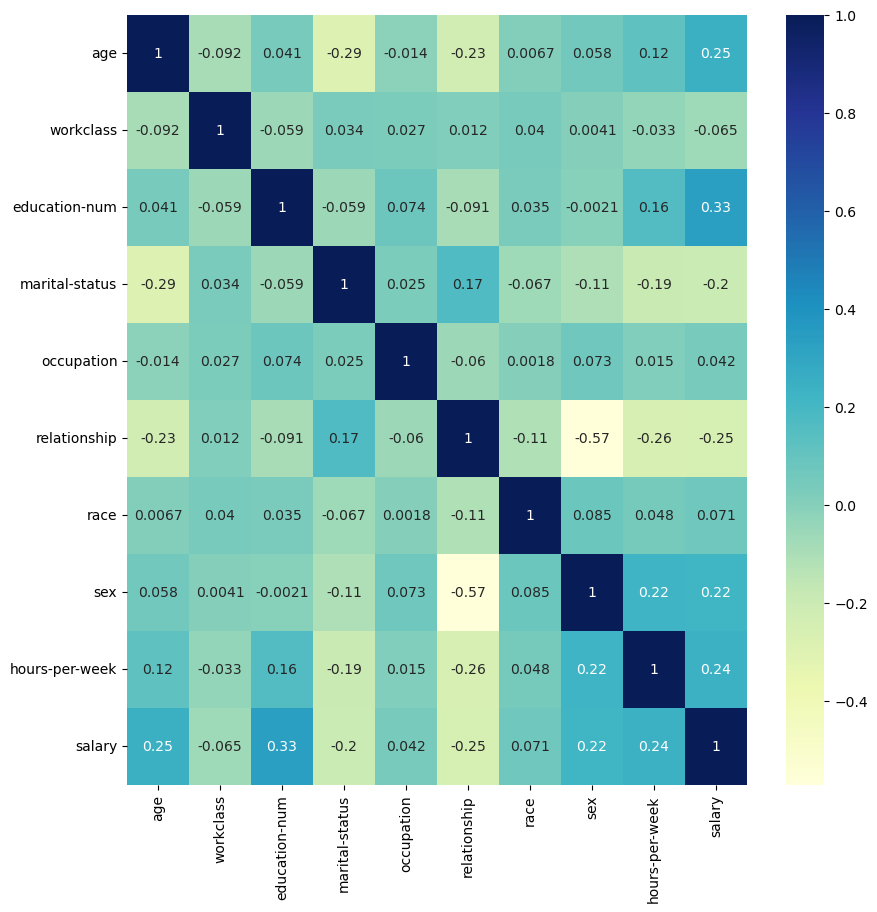

In [15]:
plt.figure(figsize=(10,10))
corr_matrix=df.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

In [16]:
#ss= StandardScaler()
#df[['age', 'hours-per-week']] = ss.fit_transform(df[['age', 'hours-per-week']])

In [17]:
x=df.drop('salary',axis=1)
y=df['salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 50 ) 

In [18]:
#lr=LinearRegression()
#model=lr.fit(x_train,y_train)
#predictions=model.predict(x_test)

In [19]:
#y_test

In [20]:
#print('MSE=:',mean_squared_error(y_test,predictions))
#print('R squared value=:',r2_score(y_test,predictions))

In [21]:
rf_class=RandomForestClassifier()
rf_class=rf_class.fit(x_train,y_train)
y_pred_rf= rf_class.predict(x_test)

In [22]:
confusion_matrix(y_test,y_pred_rf)

array([[4609,  492],
       [ 670,  873]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      5101
           1       0.64      0.57      0.60      1543

    accuracy                           0.83      6644
   macro avg       0.76      0.73      0.74      6644
weighted avg       0.82      0.83      0.82      6644



In [24]:
dt_cls= DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt= dt_cls.predict(x_test)
confusion_matrix(y_test,y_pred_dt)

array([[4450,  651],
       [ 732,  811]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      5101
           1       0.55      0.53      0.54      1543

    accuracy                           0.79      6644
   macro avg       0.71      0.70      0.70      6644
weighted avg       0.79      0.79      0.79      6644



In [26]:
svm_cls=SVC(kernel='rbf')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)
confusion_matrix(y_test,y_pred_svm)

array([[4897,  204],
       [1014,  529]], dtype=int64)

In [27]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5101
           1       0.72      0.34      0.46      1543

    accuracy                           0.82      6644
   macro avg       0.78      0.65      0.68      6644
weighted avg       0.80      0.82      0.79      6644



In [28]:
logmodel=LogisticRegression()
logmodel=logmodel.fit(x_train,y_train)
y_pred_logmodel=logmodel.predict(x_test)
confusion_matrix(y_test,y_pred_logmodel)

C:\Users\ajmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[4760,  341],
       [ 922,  621]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred_logmodel))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5101
           1       0.65      0.40      0.50      1543

    accuracy                           0.81      6644
   macro avg       0.74      0.67      0.69      6644
weighted avg       0.79      0.81      0.79      6644

